# SVM

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')  # substitua pelo caminho do seu arquivo

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Treinar o classificador SVM
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = classifier.predict(X_test)

# Avaliar a precisão do classificador
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do classificador SVM:", accuracy)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Exibir o relatório de classificação
class_report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(class_report)

Acurácia do classificador SVM: 0.925
Matriz de confusão:
[[117   7]
 [  5  31]]
Relatório de classificação:
              precision    recall  f1-score   support

        -1.0       0.96      0.94      0.95       124
         1.0       0.82      0.86      0.84        36

    accuracy                           0.93       160
   macro avg       0.89      0.90      0.89       160
weighted avg       0.93      0.93      0.93       160



# SVR

Erro quadrático médio (MSE): 0.63
Coeficiente de determinação (R²): 0.18


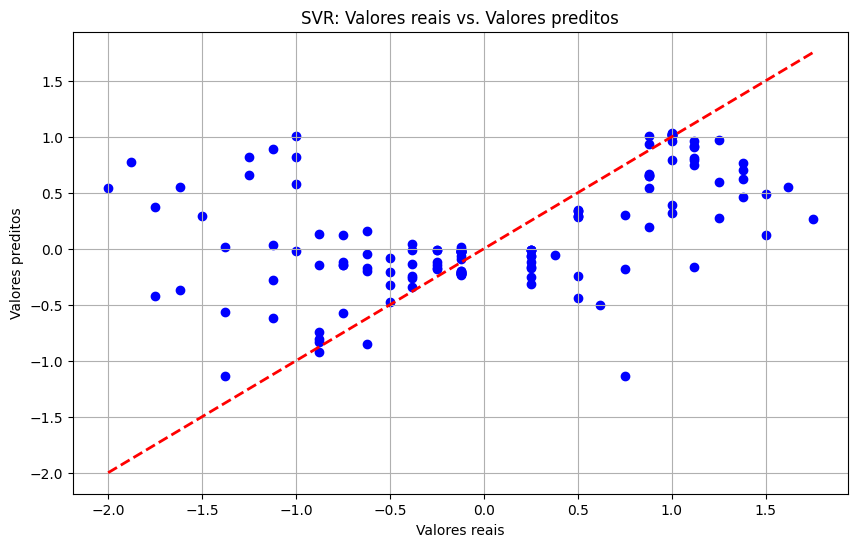

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar os dados
df_dados = pd.read_csv('df_bsi_TR.csv', sep=',')

# Filtrar as classes com mais de uma instância (não aplicável para regressão)
# Supondo que 'status' seja a variável dependente (target)
# Se for uma tarefa de classificação, isso seria relevante, mas para regressão não é necessário.

# Separar as variáveis independentes e dependentes
x = df_dados.drop(columns=['tempo_relativo']).to_numpy()
y = df_dados['tempo_relativo'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo SVR
svr_model = SVR(kernel='rbf')  # Kernel RBF é comum para problemas de regressão
svr_model.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = svr_model.predict(x_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro quadrático médio (MSE): {mse:.2f}')
print(f'Coeficiente de determinação (R²): {r2:.2f}')

# Plotar gráfico de dispersão dos resultados esperados vs. preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
plt.title('SVR: Valores reais vs. Valores preditos')
plt.grid(True)
plt.show()


# Regressão Logística 

In [50]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
X = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Logística com o solver liblinear
model = LogisticRegression(max_iter=2000, solver='liblinear', C=1.0)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Validação cruzada
cv_scores = cross_val_score(model, X, y, cv=5)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Matriz de confusão:
[[79  5]
 [ 3 20]]
Accuracy: 0.9252336448598131
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.96      0.94      0.95        84
         1.0       0.80      0.87      0.83        23

    accuracy                           0.93       107
   macro avg       0.88      0.91      0.89       107
weighted avg       0.93      0.93      0.93       107

Cross-Validation Scores: [0.87850467 0.88679245 0.90566038 0.90566038 0.8490566 ]
Mean Cross-Validation Score: 0.8851348968435901


# Árvore de Decisão

In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
X = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Matriz de confusão:
[[81  3]
 [ 5 18]]
Accuracy: 0.9252336448598131
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.94      0.96      0.95        84
         1.0       0.86      0.78      0.82        23

    accuracy                           0.93       107
   macro avg       0.90      0.87      0.89       107
weighted avg       0.92      0.93      0.92       107



# Random Forest

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
X = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Matriz de confusão:
[[77  7]
 [ 3 20]]
Accuracy: 0.9065420560747663
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.96      0.92      0.94        84
         1.0       0.74      0.87      0.80        23

    accuracy                           0.91       107
   macro avg       0.85      0.89      0.87       107
weighted avg       0.91      0.91      0.91       107



In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Treinar o modelo de Random Forests
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(x_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)


Matriz de confusão:
[[77  7]
 [ 2 21]]
Acurácia: 0.9158878504672897
Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.97      0.92      0.94        84
         1.0       0.75      0.91      0.82        23

    accuracy                           0.92       107
   macro avg       0.86      0.91      0.88       107
weighted avg       0.93      0.92      0.92       107



In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Escalar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Treinar o modelo de Random Forests
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(x_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy:.3f}')
print('Relatório de Classificação:')
print(report)


Matriz de confusão:
[[77  7]
 [ 3 20]]
Acurácia: 0.907
Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.96      0.92      0.94        84
         1.0       0.74      0.87      0.80        23

    accuracy                           0.91       107
   macro avg       0.85      0.89      0.87       107
weighted avg       0.91      0.91      0.91       107



# Naive Bayes

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Escalar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Treinar o modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# Fazer previsões
y_pred = nb_model.predict(x_test)

# Exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")
print(conf_matrix)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)


Matriz de confusão:
[[77  7]
 [ 1 22]]
Acurácia: 0.9252336448598131
Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.99      0.92      0.95        84
         1.0       0.76      0.96      0.85        23

    accuracy                           0.93       107
   macro avg       0.87      0.94      0.90       107
weighted avg       0.94      0.93      0.93       107



# K-Nearest Neighbors

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Escalar os dados
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Treinar o modelo de K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Fazer previsões
y_pred = knn_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 0.9065420560747663
Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.97      0.90      0.94        84
         1.0       0.72      0.91      0.81        23

    accuracy                           0.91       107
   macro avg       0.85      0.91      0.87       107
weighted avg       0.92      0.91      0.91       107

Matriz de Confusão:
[[76  8]
 [ 2 21]]


# AdaBoost

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Treinar o modelo de AdaBoost com o algoritmo SAMME
adaboost_model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)
adaboost_model.fit(x_train, y_train)

# Fazer previsões
y_pred = adaboost_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 0.92
Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.95      0.94      0.95        84
         1.0       0.79      0.83      0.81        23

    accuracy                           0.92       107
   macro avg       0.87      0.88      0.88       107
weighted avg       0.92      0.92      0.92       107

Matriz de Confusão:
[[79  5]
 [ 4 19]]


# Neural Net

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Pré-processar os dados: Escalonamento
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Definir e treinar o modelo de rede neural
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(x_train_scaled, y_train)

# Fazer previsões
y_pred = mlp_model.predict(x_test_scaled)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 0.92
Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.97      0.92      0.94        84
         1.0       0.75      0.91      0.82        23

    accuracy                           0.92       107
   macro avg       0.86      0.91      0.88       107
weighted avg       0.93      0.92      0.92       107

Matriz de Confusão:
[[77  7]
 [ 2 21]]


# QDA

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Treinar o modelo de QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train, y_train)

# Fazer previsões
y_pred = qda_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 0.82
Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       1.00      0.77      0.87        84
         1.0       0.55      1.00      0.71        23

    accuracy                           0.82       107
   macro avg       0.77      0.89      0.79       107
weighted avg       0.90      0.82      0.84       107

Matriz de Confusão:
[[65 19]
 [ 0 23]]


/home/wanessa/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Gaussian Process

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar os dados
df_dados = pd.read_csv('df_bsi_sem_ativo.csv', sep=',')

# Filtrar as classes com mais de uma instância
class_counts = df_dados['status'].value_counts()
classes_to_keep = class_counts[class_counts > 1].index
df_filtered = df_dados[df_dados['status'].isin(classes_to_keep)]

# Separar as variáveis independentes e dependentes
x = df_filtered.drop(columns=['status']).to_numpy()
y = df_filtered['status'].to_numpy()

# Dividir os dados em conjunto de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Definir o modelo de Gaussian Process com um kernel RBF (Radial Basis Function)
kernel = 1.0 * RBF(1.0)
gpc_model = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Treinar o modelo
gpc_model.fit(x_train, y_train)

# Fazer previsões
y_pred = gpc_model.predict(x_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:')
print(report)
print('Matriz de Confusão:')
print(conf_matrix)


Acurácia: 0.91
Relatório de Classificação:
              precision    recall  f1-score   support

        -1.0       0.95      0.93      0.94        84
         1.0       0.76      0.83      0.79        23

    accuracy                           0.91       107
   macro avg       0.86      0.88      0.87       107
weighted avg       0.91      0.91      0.91       107

Matriz de Confusão:
[[78  6]
 [ 4 19]]
